# Week 1: Setup + EDA

## 1. Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

os.chdir(r"C:/Users/User/OneDrive/Desktop/SDS/SDS-CP038-banktermpredict")

## 2. Import Data

In [2]:
full_bank_data = pd.read_csv('Data/bank-full.csv', sep=';')
full_bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
additional_bank_data = pd.read_csv('Data/bank-additional/bank-additional-full.csv', sep=';')
additional_bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 3. Data Quality Checks

3.1 Missing Values

In [4]:
full_bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
additional_bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

3.2 Duplicates

In [6]:
full_bank_data.duplicated().sum()

0

In [7]:
additional_bank_data.duplicated().sum()

12

In [8]:
additional_bank_data.drop_duplicates(inplace=True)
additional_bank_data.duplicated().sum()

0

In [9]:
additional_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

3.3 Data Types Consistency

In [10]:
print(additional_bank_data.info())
print(full_bank_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [11]:
print(additional_bank_data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [12]:
full_bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


3.4 Outliers (domain checks, IQR/z-score)

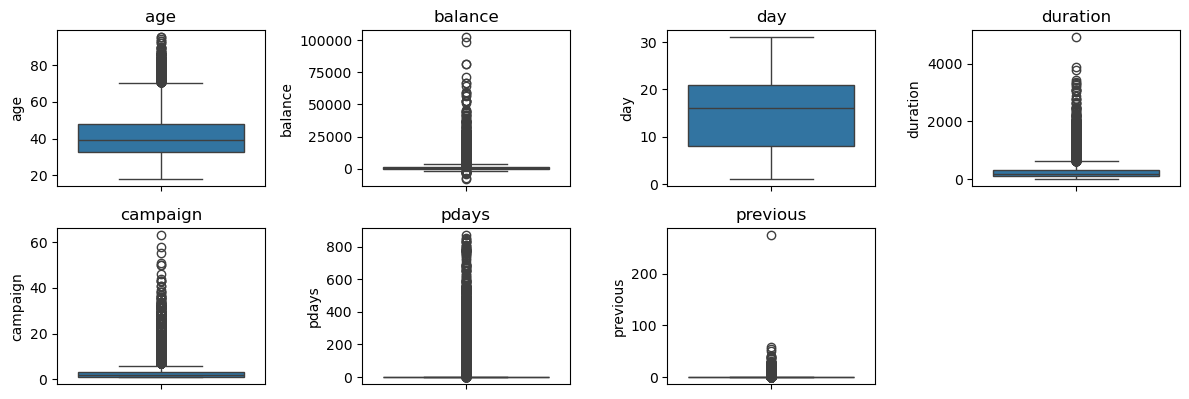

In [13]:
# Select numerical features for visualization
# additional_bank_numerical_features = additional_bank_data.select_dtypes(include=['int64', 'float64'])
full_bank_data_numerical_features = full_bank_data.select_dtypes(include=['int64', 'float64'])
# numerical_features = additional_bank_numerical_features.columns.tolist()
numerical_features = full_bank_data_numerical_features.columns.tolist()

# Box plots for numerical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    # sns.boxplot(data=additional_bank_numerical_features, y=feature)
    sns.boxplot(data=full_bank_data_numerical_features, y=feature)
    plt.title(feature)

plt.tight_layout()
plt.show()

## 4. Exploratory Data Analysis (EDA)

4.1 Univariate Distributions (histograms, KDE, boxplots)

7


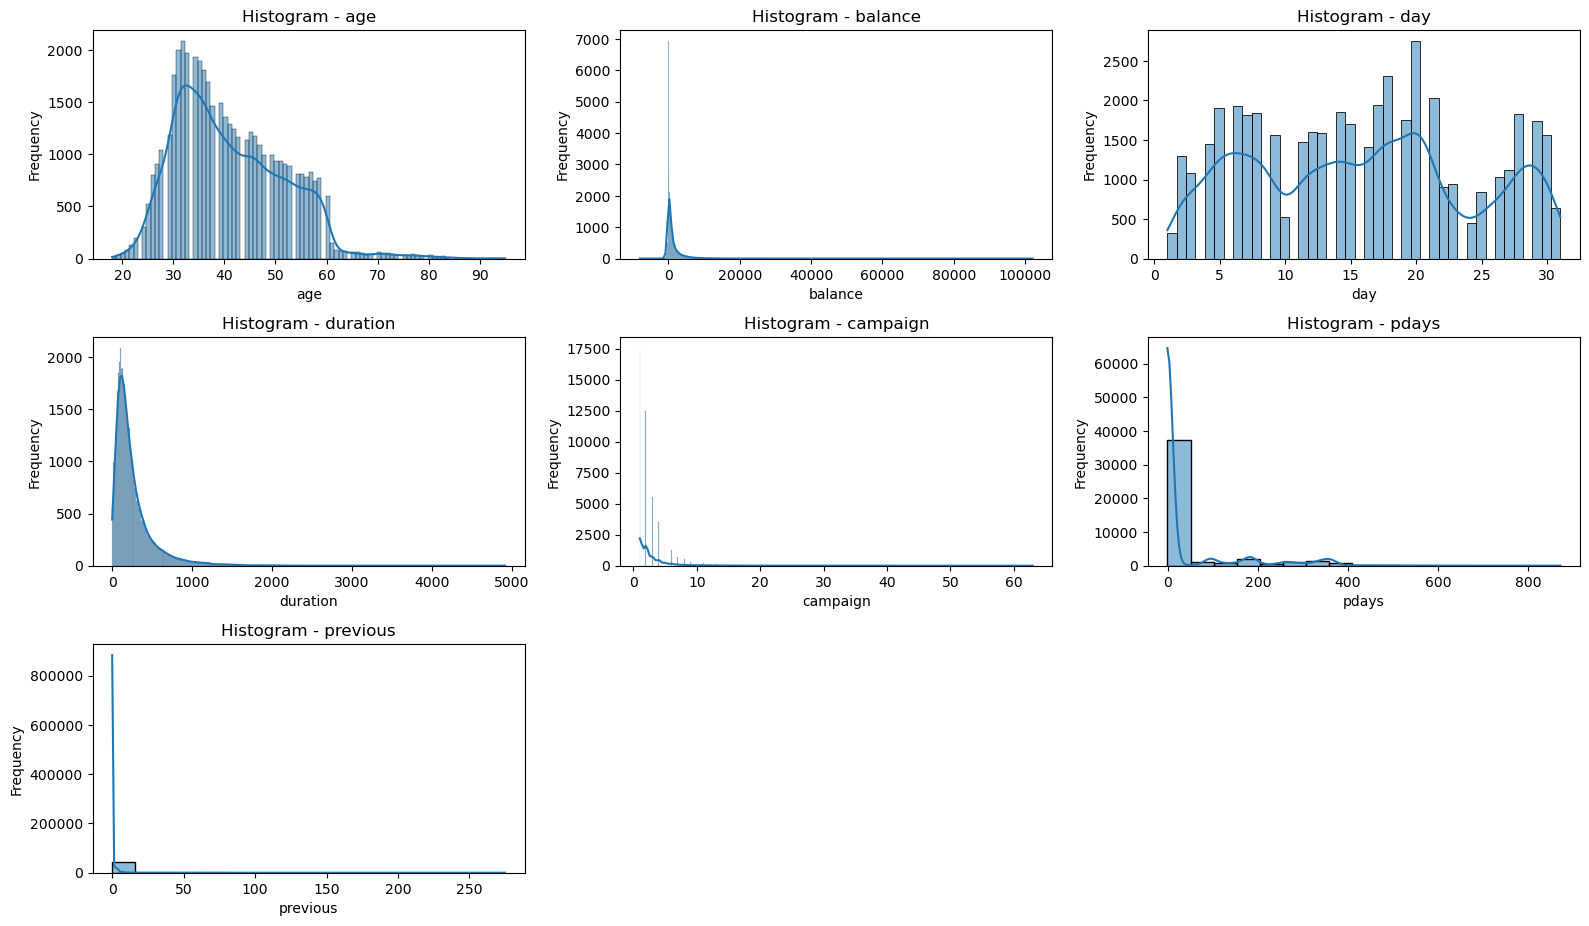

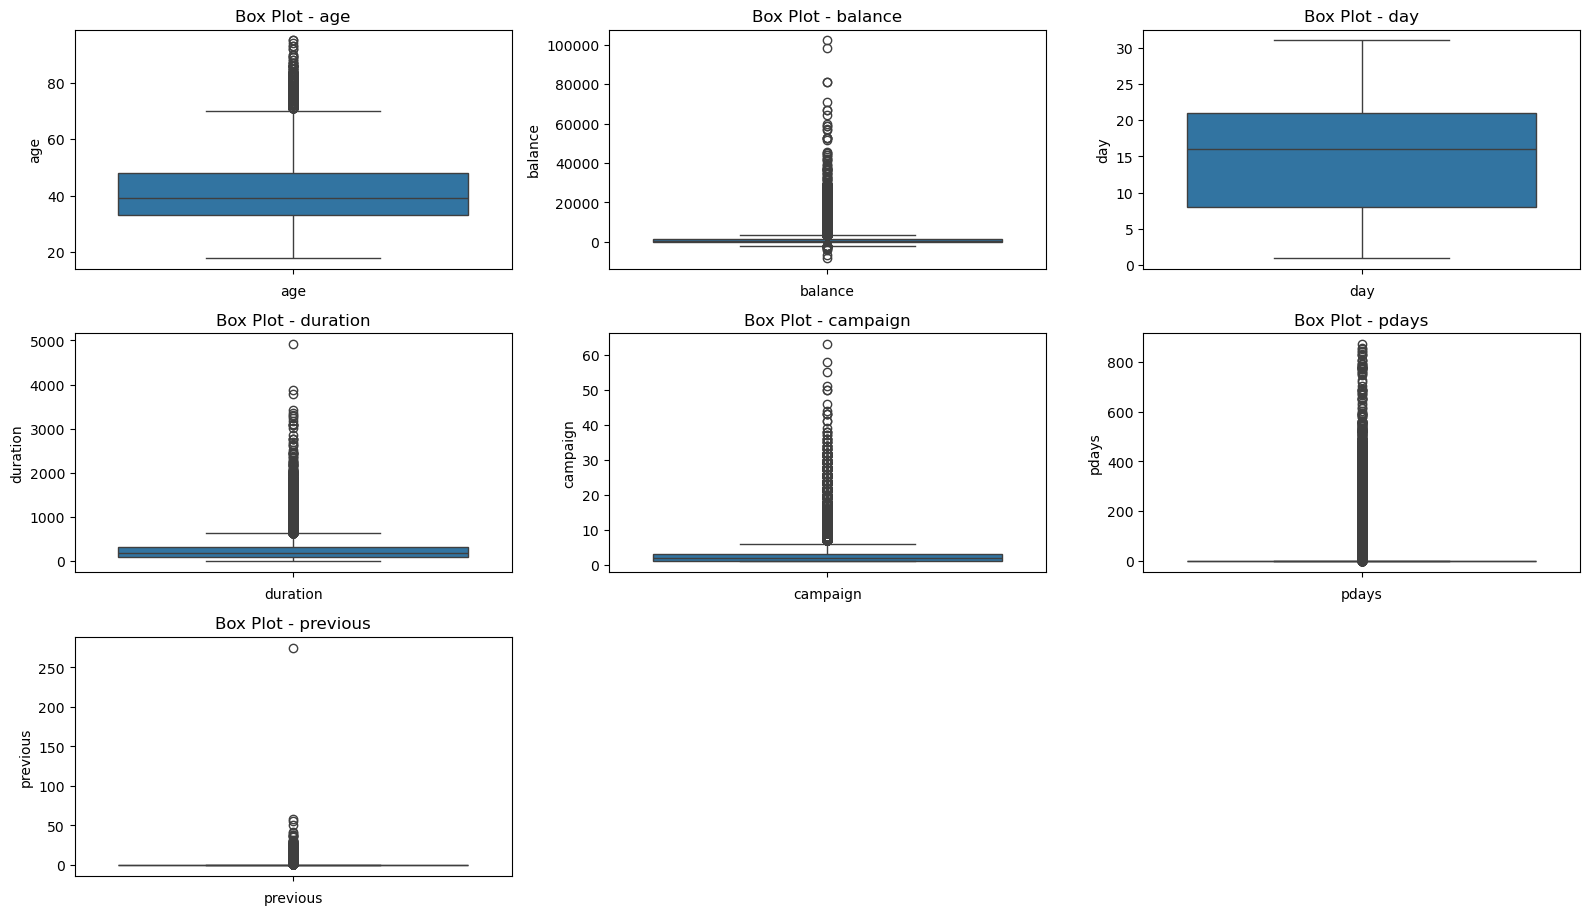

In [14]:
#visualizations and distributions for numerical variables
# Numerical variables in the dataset
# numerical_columns = additional_bank_numerical_features.columns.tolist()
numerical_columns = full_bank_data_numerical_features.columns.tolist()
print(len(numerical_columns))

# Plotting histograms for numerical variables
plt.figure(figsize=(16, 12))
for i, var in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    # sns.histplot(additional_bank_numerical_features[var], kde=True)
    sns.histplot(full_bank_data_numerical_features[var], kde=True)
    plt.title(f'Histogram - {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plotting box plots for numerical variables
plt.figure(figsize=(16, 12))
for i, var in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    # sns.boxplot(additional_bank_numerical_features[var])
    sns.boxplot(full_bank_data_numerical_features[var])
    plt.title(f'Box Plot - {var}')
    plt.xlabel(var)
plt.tight_layout()
plt.show()

4.2 Bivariate Relationships (scatter, groupby stats)

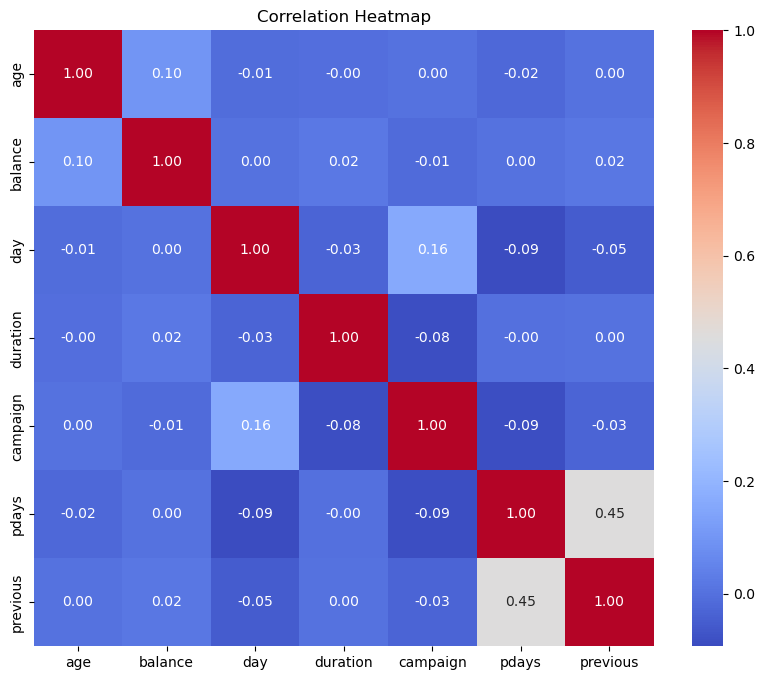

In [15]:
# Correlation matrix
# correlation_matrix = additional_bank_numerical_features[numerical_columns].corr()
correlation_matrix = full_bank_data_numerical_features[numerical_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

4.4 Target Variable (`y`) Inspection

In [16]:
full_bank_data['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

4.5 Class Balance (counts, %)

## 5. Feature Engineering

5.1 Domain Features

In [17]:
full_bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [18]:
full_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [19]:
full_bank_data['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [20]:
full_bank_data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [22]:
categorical_features = full_bank_data.select_dtypes(include=['object'])

le = LabelEncoder()
for col in categorical_features:
    full_bank_data[col] = le.fit_transform(full_bank_data[col])

full_bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [23]:
full_bank_data['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

5.2 Aggregations / Ratios / Interactions

5.3 Temporal/Recency Features (if applicable)

5.4 Feature Documentation (what, why, how)

## 6. Imbalance Handling (Preliminary)

6.1 Strategy Rationale (SMOTE vs. Class Weights vs. Thresholding)

In [24]:
full_bank_data['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

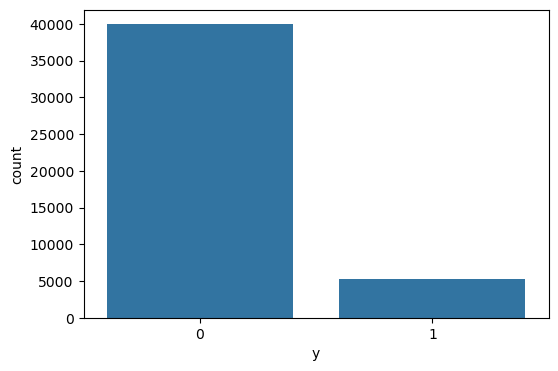

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=full_bank_data);

6.2 Chosen Approach & Justification

In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

y = full_bank_data['y']
X = full_bank_data.drop('y', axis=1)

over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
under_sampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
pipeline = Pipeline(steps=[
    ('over', over_sampler),
    ('under', under_sampler)
])

X_balanced, y_balanced = pipeline.fit_resample(X, y)
print(pd.Series(y_balanced).value_counts())


y
0    19961
1    19961
Name: count, dtype: int64


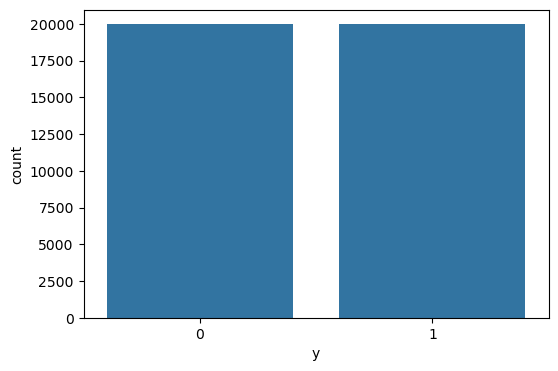

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_balanced);

In [28]:
X_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39922 entries, 27950 to 59882
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        39922 non-null  int64
 1   job        39922 non-null  int32
 2   marital    39922 non-null  int32
 3   education  39922 non-null  int32
 4   default    39922 non-null  int32
 5   balance    39922 non-null  int64
 6   housing    39922 non-null  int32
 7   loan       39922 non-null  int32
 8   contact    39922 non-null  int32
 9   day        39922 non-null  int64
 10  month      39922 non-null  int32
 11  duration   39922 non-null  int64
 12  campaign   39922 non-null  int64
 13  pdays      39922 non-null  int64
 14  previous   39922 non-null  int64
 15  poutcome   39922 non-null  int32
dtypes: int32(9), int64(7)
memory usage: 3.8 MB


6.3 Sanity Checks (no leakage, applied only to train)

---
# Week II–III: Data Preprocessing + Model Development

## 1. Preprocessing

1.1 Train/Validation/Test Split (with stratification if needed)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


1.2 Categorical Encoding (label / one-hot)

1.3 Numeric Scaling (StandardScaler / MinMaxScaler)

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

1.4 Building Pipeline (ColumnTransformer + Pipeline)

## 2. Baseline Models

2.1 Logistic Regression (default settings)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8031308703819662
Confusion Matrix:
 [[3230  763]
 [ 809 3183]]


2.2 Decision Tree (default settings)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42, criterion='gini')
dtc.fit(X_train_scaled, y_train)
y_pred_dtc = dtc.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_dtc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtc))

Accuracy: 0.9340012523481528
Confusion Matrix:
 [[3529  464]
 [  63 3929]]


2.3 Random Forest (default settings)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, n_estimators=100)
rfc.fit(X_train_scaled, y_train)
y_pred_rfc = rfc.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rfc))

Accuracy: 0.9430181590482154
Confusion Matrix:
 [[3588  405]
 [  50 3942]]


2.4 Fit → Predict → Evaluate (val set)

## 3. Boosting Experiments

3.1 XGBoost

3.2 LightGBM

## 4. Experiment Tracking (MLflow)

4.1 MLflow Setup (tracking URI, experiment name)

4.2 Log Params, Metrics, Artifacts

## 5. Evaluation & Diagnostics

## 6. Model Comparison

## 7. Hyperparameter Tuning

7.1 GridSearchCV / RandomizedSearchCV (CV strategy)

7.2 Best Params & CV Scores

7.3 Refit on Train+Val

## 8. Final Model Selection

8.1 Compare Tuned Models (val/test metrics)

8.2 Final Choice & Rationale

## 9. Save Preprocessing Pipeline + Model

---
# Week IV: Model Tuning + Deployment

## 1. Streamlit App

This step must be completed in a separate app.py file